In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

FIG_PATH = './Figures/'

In [2]:
with open ('/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/ablation/images/names.txt', 'r') as f:
    names = f.readlines()
    names = [name.strip() for name in names]

In [3]:
# Create a directory for each name
for name in names:
    if not os.path.exists(FIG_PATH + name):
        os.makedirs(FIG_PATH + name)

In [4]:
with open ('/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/ablation/images/pair_names.txt', 'r') as f:
    pair_names = f.readlines()
    pair_names = [name.strip() for name in pair_names]

In [5]:
mobile_ps = {}

for i in names:
    mobile_ps[i] = {}
    mobile_ps[i]['A'] = False
    mobile_ps[i]['B'] = False


mobile_ps['Custom (MOBILE)']['A'] = True
mobile_ps['Custom (MOBILE)']['B'] = True
mobile_ps['Illum']['A'] = True
mobile_ps['Illum']['B'] = True
mobile_ps['Lovin’ Malta']['A'] = True
mobile_ps['Malta Today']['B'] = True
mobile_ps['The Shift']['B'] = True

In [6]:
pairs = [(i, i + 10) for i in range(10)]

In [7]:
# path = '../ablation/aois/'

In [8]:
# for i, pair_name in enumerate(pair_names[:10]):
#     name = names[pairs[i][0]]
#     print(i, name, pair_name)

#     AOI_DIR = path + 'A' + '/'

#     # Create a copy of each image at ./Figures/<name>/<pair_name>_AOI.png
#     img = cv2.imread(AOI_DIR + str(i) + '.jpg')
#     cv2.imwrite(FIG_PATH + name + '/' + pair_name + '_AOI.png', img)

In [9]:
# for i, pair_name in enumerate(pair_names[10:]):
#     name = names[pairs[i][0]]
#     print(i, name, pair_name)

#     AOI_DIR = path + 'B' + '/'

#     # Create a copy of each image at ./Figures/<name>/<pair_name>_AOI.png
#     img = cv2.imread(AOI_DIR + str(i) + '.jpg')
#     cv2.imwrite(FIG_PATH + name + '/' + pair_name + '_AOI.png', img)

In [10]:
# path = '../gazedataset/GazePoint/'

In [11]:
# switch_A = {
#     0: 0,
#     1: 4,
#     2: 5,
#     3: 3,
#     4: 6,
#     5: 1,
#     6: 7,
#     7: 8,
#     8: 2,
#     9: 9
# }

In [12]:
# switch_B = {
#     0: 0,
#     1: 4,
#     2: 5,
#     3: 3,
#     4: 6,
#     5: 1,
#     6: 7,
#     7: 8,
#     8: 2,
#     9: 9
# }

In [13]:
# # Rename
# for i, pair_name in enumerate(pair_names[10:]):
#     name = names[pairs[i][0]]
#     print(i, name, pair_name)

#     EYE_DIR = path + 'GROUP B' + '/' + 'result' + '/' + 'B' + '/'

#     # List all images and find the one which ends in 'A<i>.png'
#     for img_name in os.listdir(EYE_DIR):
#         if img_name.startswith('image') and img_name.endswith('B' + str(i) + '.png'):
#             img = cv2.imread(EYE_DIR + img_name)
#             cv2.imwrite(EYE_DIR + 'B' + str(switch_B[i]) + '.png', img)
#             print(EYE_DIR + 'B' + str(switch_B[i]) + '.png')
#             break

#     print()

In [14]:
# for i, pair_name in enumerate(pair_names[:10]):
#     name = names[pairs[i][0]]
#     print(i, name, pair_name)

#     EYE_DIR = path + 'GROUP A' + '/' + 'result' + '/' + 'A' + '/'

#     # List all images and find the one which ends in 'A<i>.png'
#     for img_name in os.listdir(EYE_DIR):
#         if img_name.endswith('A' + str(i) + '.png'):
#             img = cv2.imread(EYE_DIR + img_name)
#             cv2.imwrite(FIG_PATH + name + '/' + pair_name + '_EYE.png', img)
#             print(img_name)

In [15]:
# for i, pair_name in enumerate(pair_names[10:]):
#     name = names[pairs[i][0]]
#     print(i, name, pair_name)

#     EYE_DIR = path + 'GROUP B' + '/' + 'result' + '/' + 'B' + '/'

#     # List all images and find the one which ends in 'B<i>.png'
#     for img_name in os.listdir(EYE_DIR):
#         if img_name.endswith('B' + str(i) + '.png'):
#             img = cv2.imread(EYE_DIR + img_name)
#             cv2.imwrite(FIG_PATH + name + '/' + pair_name + '_EYE.png', img)
#             print(img_name)

In [16]:
images = {}
aois = {}
deepgaze = {}
tracking = {}
trajectories = {}
ranks = {}

In [17]:
def crop_transparent(image):
    # Convert image to RGBA if it's not already in that format
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Create a mask of non-transparent pixels
    # mask has same shape as image
    mask = np.zeros_like(image[:,:,3])
    mask[image[:,:,3] == 0] = 255

    # Create copy of the image from the coordinates of the mask which are 255
    cropped_image = image[np.min(np.where(mask == 0)[0]):np.max(np.where(mask == 0)[0]), np.min(np.where(mask == 0)[1]):np.max(np.where(mask == 0)[1])]

    return cv2.cvtColor(cropped_image, cv2.COLOR_BGRA2RGB)

In [18]:
new_width = 1920
new_height = 1080

for p in range(10):
    DIR = FIG_PATH + names[p] + '/'

    images[names[pairs[p][0]]] = {}
    images[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '.png', cv2.IMREAD_UNCHANGED)
    images[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '.png', cv2.IMREAD_UNCHANGED)

    for key in images[names[pairs[p][0]]]:
        images[names[pairs[p][0]]][key] = crop_transparent(images[names[pairs[p][0]]][key])

        if mobile_ps[names[pairs[p][0]]][key]:
            images[names[pairs[p][0]]][key] = cv2.resize(images[names[pairs[p][0]]][key], (new_height, new_width))
            # images[names[pairs[p][0]]][key] = cv2.rotate(images[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
        else:   
            images[names[pairs[p][0]]][key] = cv2.resize(images[names[pairs[p][0]]][key], (new_width, new_height))

    aois[names[pairs[p][0]]] = {}
    aois[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_AOI.png', cv2.IMREAD_UNCHANGED)
    aois[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_AOI.png', cv2.IMREAD_UNCHANGED)

    for key in aois[names[pairs[p][0]]]:
        aois[names[pairs[p][0]]][key] = crop_transparent(aois[names[pairs[p][0]]][key])

        if mobile_ps[names[pairs[p][0]]][key]:
            aois[names[pairs[p][0]]][key] = cv2.resize(aois[names[pairs[p][0]]][key], (new_height, new_width))
            # aois[names[pairs[p][0]]][key] = cv2.rotate(aois[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
        else:
            aois[names[pairs[p][0]]][key] = cv2.resize(aois[names[pairs[p][0]]][key], (new_width, new_height))

    deepgaze[names[pairs[p][0]]] = {}
    deepgaze[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)
    deepgaze[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)
    for key in deepgaze[names[pairs[p][0]]]:
        deepgaze[names[pairs[p][0]]][key] = crop_transparent(deepgaze[names[pairs[p][0]]][key])

        if mobile_ps[names[pairs[p][0]]][key]:
            deepgaze[names[pairs[p][0]]][key] = cv2.resize(deepgaze[names[pairs[p][0]]][key], (new_height, new_width))
            # deepgaze[names[pairs[p][0]]][key] = cv2.rotate(deepgaze[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
        else:
            deepgaze[names[pairs[p][0]]][key] = cv2.resize(deepgaze[names[pairs[p][0]]][key], (new_width, new_height))

    try:
        tracking[names[pairs[p][0]]] = {}
        tracking[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_EYE.png', cv2.IMREAD_UNCHANGED)
        tracking[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_EYE.png', cv2.IMREAD_UNCHANGED)

        for key in tracking[names[pairs[p][0]]]:
            tracking[names[pairs[p][0]]][key] = crop_transparent(tracking[names[pairs[p][0]]][key])

            if mobile_ps[names[pairs[p][0]]][key]:
                tracking[names[pairs[p][0]]][key] = cv2.resize(tracking[names[pairs[p][0]]][key], (new_height, new_width))
                # tracking[names[pairs[p][0]]][key] = cv2.rotate(tracking[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
            else:
                tracking[names[pairs[p][0]]][key] = cv2.resize(tracking[names[pairs[p][0]]][key], (new_width, new_height))
    except:
        tracking[names[pairs[p][0]]] = {}
        tracking[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)
        tracking[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)

        for key in tracking[names[pairs[p][0]]]:
            tracking[names[pairs[p][0]]][key] = crop_transparent(tracking[names[pairs[p][0]]][key])

            if mobile_ps[names[pairs[p][0]]][key]:
                tracking[names[pairs[p][0]]][key] = cv2.resize(tracking[names[pairs[p][0]]][key], (new_height, new_width))
                # tracking[names[pairs[p][0]]][key] = cv2.rotate(tracking[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
            else:
                tracking[names[pairs[p][0]]][key] = cv2.resize(tracking[names[pairs[p][0]]][key], (new_width, new_height))

    trajectories[names[pairs[p][0]]] = {}
    trajectories[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_MOUSE.png', cv2.IMREAD_UNCHANGED)
    trajectories[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_MOUSE.png', cv2.IMREAD_UNCHANGED)

    for key in trajectories[names[pairs[p][0]]]:
        trajectories[names[pairs[p][0]]][key] = crop_transparent(trajectories[names[pairs[p][0]]][key])

        if mobile_ps[names[pairs[p][0]]][key]:
            trajectories[names[pairs[p][0]]][key] = cv2.resize(trajectories[names[pairs[p][0]]][key], (new_height, new_width))
            # trajectories[names[pairs[p][0]]][key] = cv2.rotate(trajectories[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
        else:
            trajectories[names[pairs[p][0]]][key] = cv2.resize(trajectories[names[pairs[p][0]]][key], (new_width, new_height))

    ranks[names[pairs[p][0]]] = {}
    ranks[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_RANKS.png', cv2.IMREAD_UNCHANGED)
    ranks[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_RANKS.png', cv2.IMREAD_UNCHANGED)

    for key in ranks[names[pairs[p][0]]]:
        ranks[names[pairs[p][0]]][key] = crop_transparent(ranks[names[pairs[p][0]]][key])

        if mobile_ps[names[pairs[p][0]]][key]:
            ranks[names[pairs[p][0]]][key] = cv2.resize(ranks[names[pairs[p][0]]][key], (new_height, new_width))
            # ranks[names[pairs[p][0]]][key] = cv2.rotate(ranks[names[pairs[p][0]]][key], cv2.ROTATE_90_CLOCKWISE)
        else:
            ranks[names[pairs[p][0]]][key] = cv2.resize(ranks[names[pairs[p][0]]][key], (new_width, new_height))


In [19]:
from PIL import ImageFont, ImageDraw, Image

# Add 100px of black at the bottom of each image, as well as a corresponding label in text
for p in range(10):
    # Black top
    border_size = 80
    o = 5
    colour = (21, 21, 21)
    for group in ['A', 'B']:
        # if mobile_ps[names[pairs[p][0]]][group]:
        #     images[names[pairs[p][0]]][group] =         cv2.copyMakeBorder(images[names[pairs[p][0]]][group], border_size, o, o, o, cv2.BORDER_CONSTANT, value=colour)
        #     aois[names[pairs[p][0]]][group] =           cv2.copyMakeBorder(aois[names[pairs[p][0]]][group], border_size, o, o, o, cv2.BORDER_CONSTANT, value=colour)
        #     deepgaze[names[pairs[p][0]]][group] =       cv2.copyMakeBorder(deepgaze[names[pairs[p][0]]][group], border_size, o, o, o, cv2.BORDER_CONSTANT, value=colour)
        #     tracking[names[pairs[p][0]]][group] =       cv2.copyMakeBorder(tracking[names[pairs[p][0]]][group], border_size, o, o, o, cv2.BORDER_CONSTANT, value=colour)
        #     trajectories[names[pairs[p][0]]][group] =   cv2.copyMakeBorder(trajectories[names[pairs[p][0]]][group], border_size, o, o, o, cv2.BORDER_CONSTANT, value=colour)
        #     ranks[names[pairs[p][0]]][group] =          cv2.copyMakeBorder(ranks[names[pairs[p][0]]][group], border_size, o, o, o, cv2.BORDER_CONSTANT, value=colour)
        # else:
        images[names[pairs[p][0]]][group] =         cv2.copyMakeBorder(images[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        aois[names[pairs[p][0]]][group] =           cv2.copyMakeBorder(aois[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        deepgaze[names[pairs[p][0]]][group] =       cv2.copyMakeBorder(deepgaze[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        tracking[names[pairs[p][0]]][group] =       cv2.copyMakeBorder(tracking[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        trajectories[names[pairs[p][0]]][group] =   cv2.copyMakeBorder(trajectories[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        ranks[names[pairs[p][0]]][group] =          cv2.copyMakeBorder(ranks[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)

    # Text
    for group in ['A', 'B']:
        font_colour = (232, 232, 232)
        text_x = 20

        if mobile_ps[names[pairs[p][0]]][group]:
            text_y = 1935
        else:
            text_y = 1095

        text = names[pairs[p][0]]

        if group == 'A':
            text += ' | CTRL'
        else:
            text += ' | EXPR'

        font_path = '/home/matthewkenely/Downloads/JetBrains/fonts/ttf/JetBrainsMono-Regular.ttf'
        font_size = 45
        font = ImageFont.truetype(font_path, font_size)

        pil_image = Image.fromarray(images[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text, font=font, fill=font_colour, align="left")
        images[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(aois[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | AOI', font=font, fill=font_colour, align="left")
        aois[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(deepgaze[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | DEEPGAZE', font=font, fill=font_colour, align="left")
        deepgaze[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(tracking[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | EYE', font=font, fill=font_colour, align="left")
        tracking[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(trajectories[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | MOUSE', font=font, fill=font_colour, align="left")
        trajectories[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(ranks[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | SARA', font=font, fill=font_colour, align="left")
        ranks[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)


        # if mobile_ps[names[pairs[p][0]]][group]:
        #     # Rotate images back
        #     images[names[pairs[p][0]]][group] = cv2.rotate(images[names[pairs[p][0]]][group], cv2.ROTATE_90_COUNTERCLOCKWISE)
        #     aois[names[pairs[p][0]]][group] = cv2.rotate(aois[names[pairs[p][0]]][group], cv2.ROTATE_90_COUNTERCLOCKWISE)
        #     deepgaze[names[pairs[p][0]]][group] = cv2.rotate(deepgaze[names[pairs[p][0]]][group], cv2.ROTATE_90_COUNTERCLOCKWISE)
        #     tracking[names[pairs[p][0]]][group] = cv2.rotate(tracking[names[pairs[p][0]]][group], cv2.ROTATE_90_COUNTERCLOCKWISE)
        #     trajectories[names[pairs[p][0]]][group] = cv2.rotate(trajectories[names[pairs[p][0]]][group], cv2.ROTATE_90_COUNTERCLOCKWISE)
        #     ranks[names[pairs[p][0]]][group] = cv2.rotate(ranks[names[pairs[p][0]]][group], cv2.ROTATE_90_COUNTERCLOCKWISE)

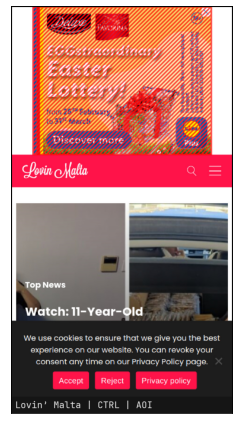

In [20]:
plt.figure(figsize=(12,6))
plt.imshow(aois[names[pairs[3][0]]]['A'])
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

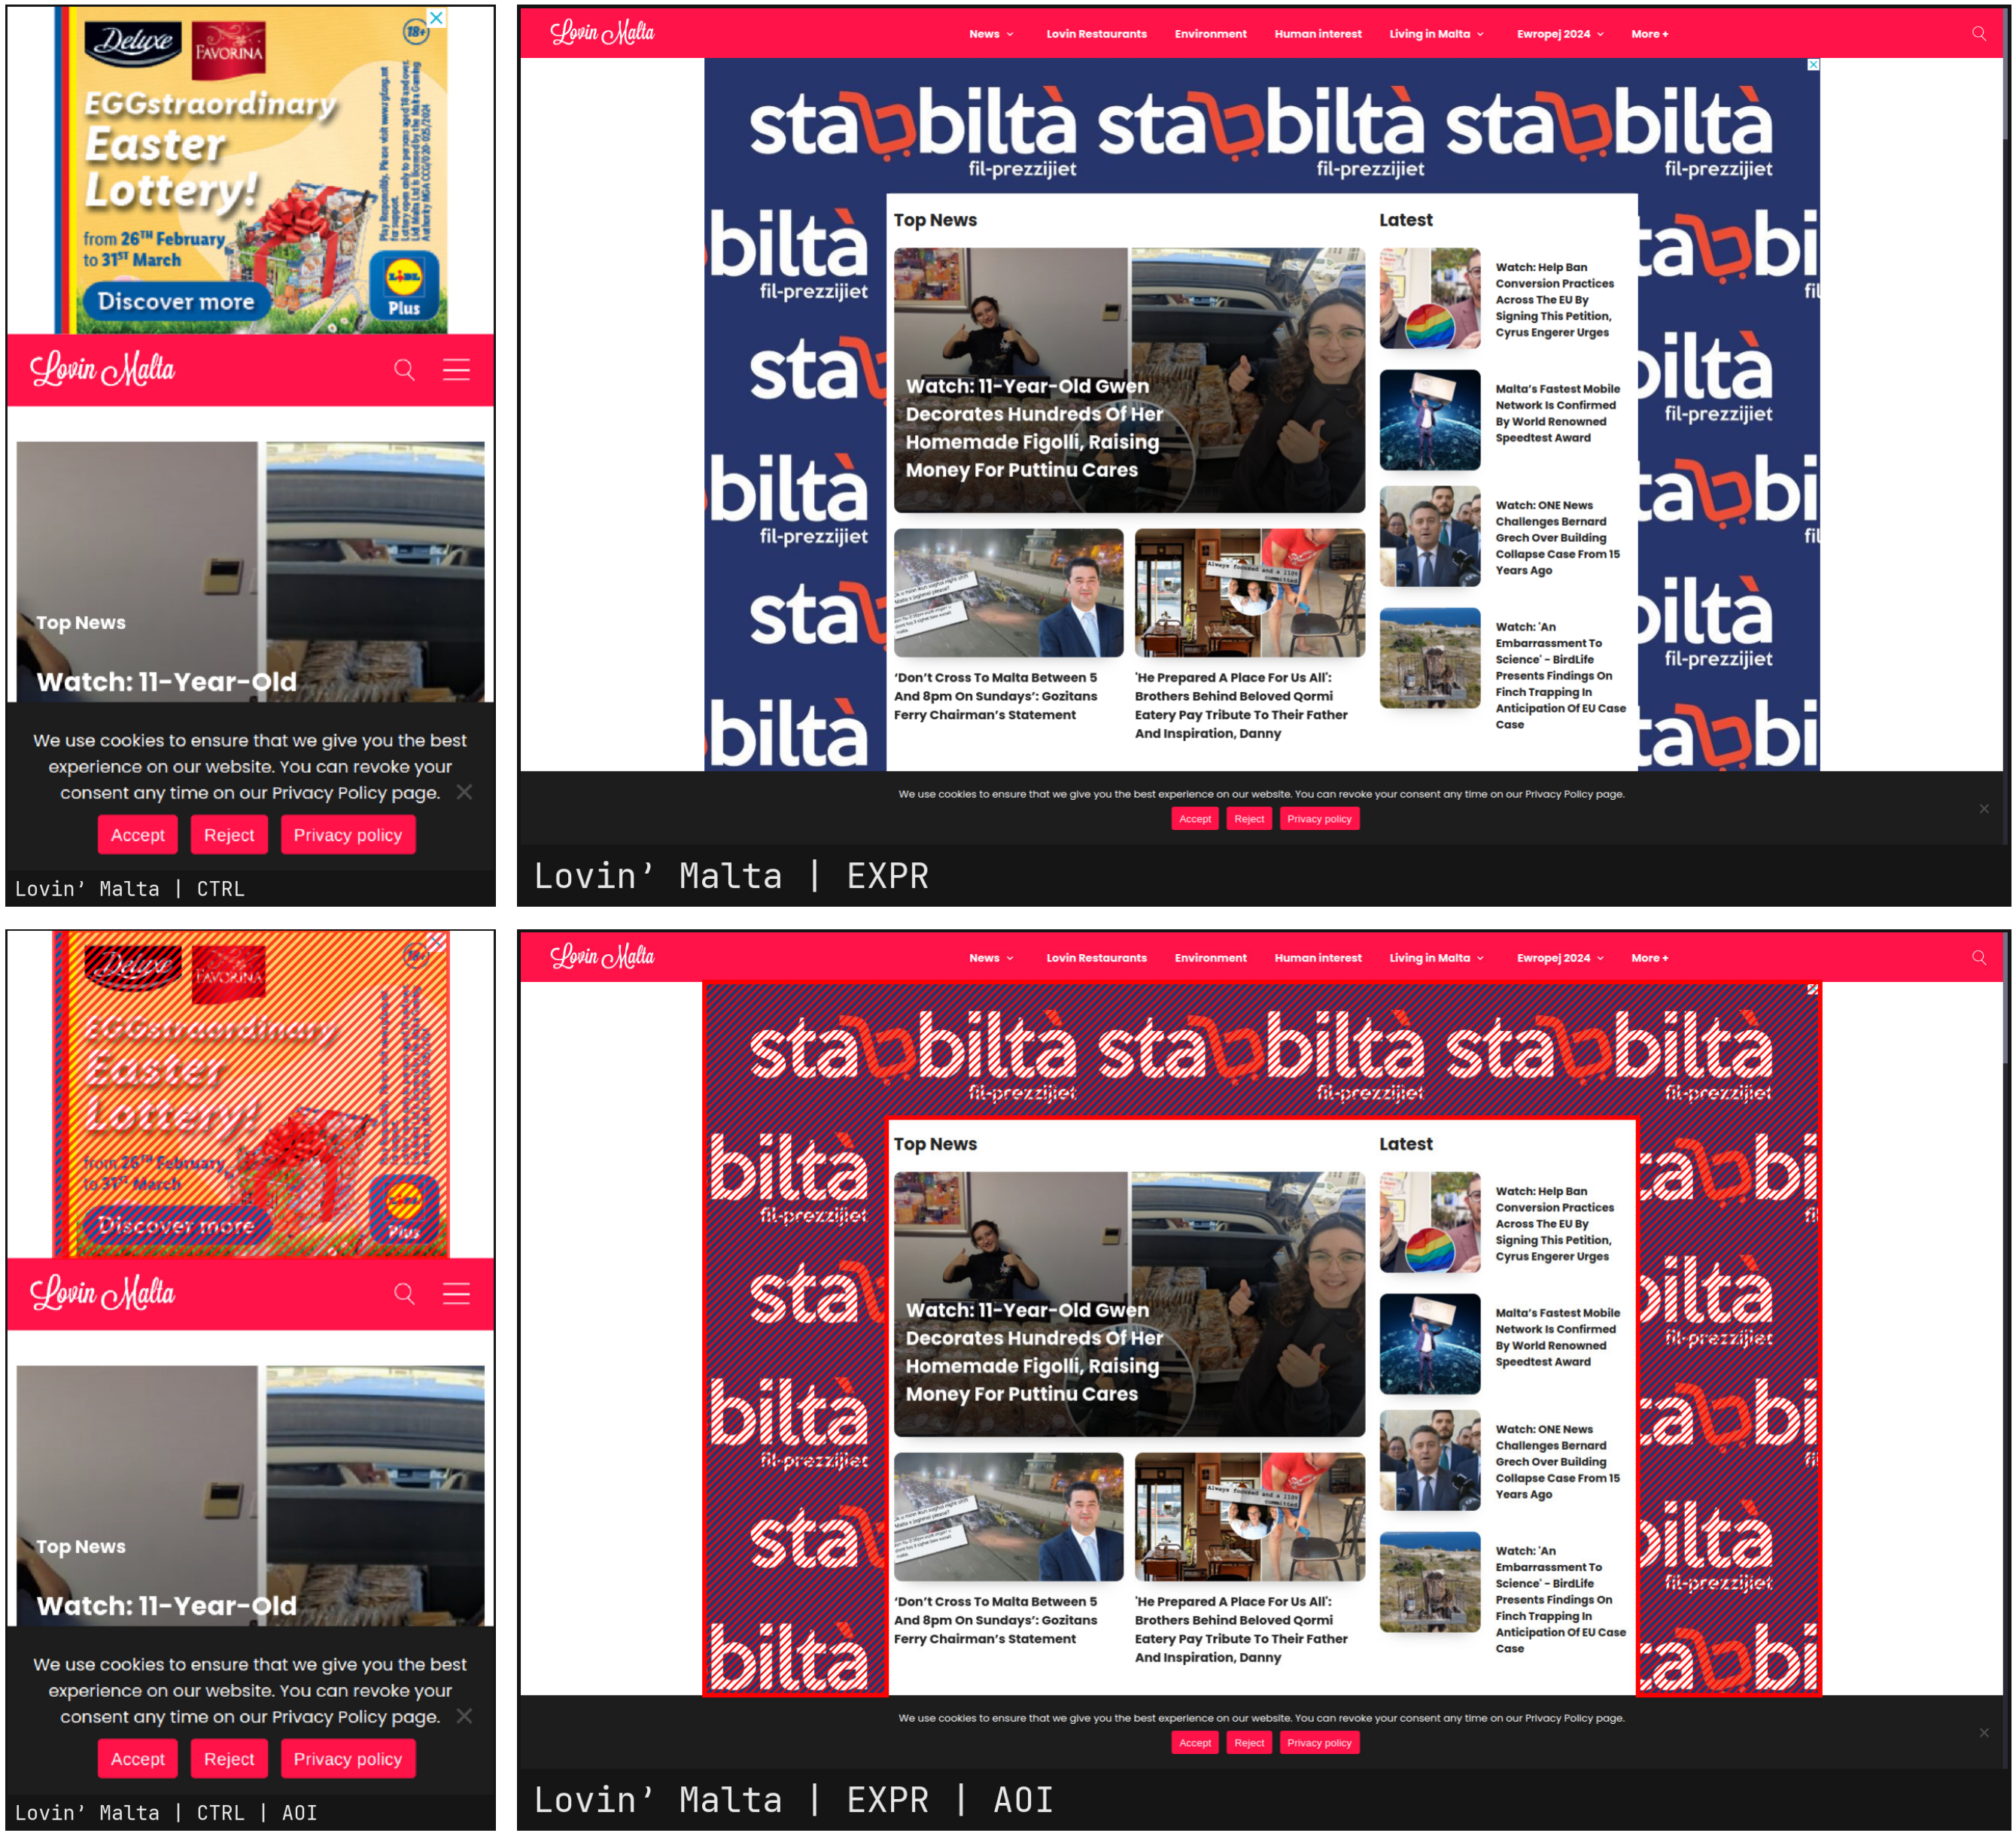

In [21]:
for p in range(10):
    if p != 3:
        continue

    if mobile_ps[names[p]]['A'] and mobile_ps[names[p]]['B']:
        plt.figure(figsize=(48, 34))

        plt.subplot(2,2,1)
        plt.imshow(images[names[p]]['A'], aspect='equal')
        plt.axis('off')

        plt.subplot(2,2,2)
        plt.imshow(images[names[p]]['B'], aspect='equal')
        plt.axis('off')

        plt.subplot(2,2,3)
        plt.imshow(aois[names[p]]['A'], aspect='equal')
        plt.axis('off')

        plt.subplot(2,2,4)
        plt.imshow(aois[names[p]]['B'], aspect='equal')
        plt.axis('off')

        plt.tight_layout(h_pad=1.5, w_pad=-133)

        plt.savefig(FIG_PATH + names[p] + '/' + f'{names[p]} AOI.png', bbox_inches='tight', pad_inches=0.1)
        plt.savefig(FIG_PATH + 'AOI/' + f'{names[p]} AOI.png', bbox_inches='tight', pad_inches=0.1)

        plt.show()
    else:
        plt.figure(figsize=(48, 34))
        
        plt.subplot(2,2,1)
        plt.imshow(images[names[p]]['A'], aspect='equal')
        plt.axis('off')

        plt.subplot(2,2,2)
        plt.imshow(images[names[p]]['B'], aspect='equal')
        plt.axis('off')

        plt.subplot(2,2,3)
        plt.imshow(aois[names[p]]['A'], aspect='equal')
        plt.axis('off')

        plt.subplot(2,2,4)
        plt.imshow(aois[names[p]]['B'], aspect='equal')
        plt.axis('off')

        if mobile_ps[names[p]]['A'] or mobile_ps[names[p]]['B']:
            plt.tight_layout(h_pad=3, w_pad=-36)
        else:
            plt.tight_layout(h_pad=-22, w_pad=2)

        plt.savefig(FIG_PATH + names[p] + '/' + f'{names[p]} AOI.png', bbox_inches='tight', pad_inches=0.1)
        plt.savefig(FIG_PATH + 'AOI/' + f'{names[p]} AOI.png', bbox_inches='tight', pad_inches=0.1)

        plt.show()

In [22]:
# for p in range(10):
#     if mobile_ps[names[p]]['A'] and mobile_ps[names[p]]['B']:
#         plt.figure(figsize=(48, 34))

#         plt.subplot(2,4,1)
#         plt.imshow(tracking[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,5)
#         plt.imshow(tracking[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,2)
#         plt.imshow(trajectories[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,6)
#         plt.imshow(trajectories[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,3)
#         plt.imshow(deepgaze[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,7)
#         plt.imshow(deepgaze[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,4)
#         plt.imshow(ranks[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(2,4,8)
#         plt.imshow(ranks[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.tight_layout(h_pad=1.5, w_pad=-62)

#         plt.savefig(FIG_PATH + names[p] + '/' + f'{names[p]} Summary.png', bbox_inches='tight', pad_inches=0.1)
#         plt.savefig(FIG_PATH + 'Summaries/' + f'{names[p]} Summary.png', bbox_inches='tight', pad_inches=0.1)

#         plt.show()
#     else:
#         plt.figure(figsize=(34, 48))

#         plt.subplot(4,2,1)
#         plt.imshow(tracking[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,2)
#         plt.imshow(tracking[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,3)
#         plt.imshow(trajectories[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,4)
#         plt.imshow(trajectories[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,5)
#         plt.imshow(deepgaze[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,6)
#         plt.imshow(deepgaze[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,7)
#         plt.imshow(ranks[names[p]]['A'], aspect='equal')
#         plt.axis('off')

#         plt.subplot(4,2,8)
#         plt.imshow(ranks[names[p]]['B'], aspect='equal')
#         plt.axis('off')

#         if mobile_ps[names[p]]['A'] or mobile_ps[names[p]]['B']:
#             plt.tight_layout(h_pad=1.5, w_pad=-26)
#         else:
#             plt.tight_layout(h_pad=-42, w_pad=1.5)

#         plt.savefig(FIG_PATH + names[p] + '/' + f'{names[p]} Summary.png', bbox_inches='tight', pad_inches=0.1)
#         plt.savefig(FIG_PATH + 'Summaries/' + f'{names[p]} Summary.png', bbox_inches='tight', pad_inches=0.1)

#         plt.show()